# Capstone Project: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [1]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [2]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [4]:
# Examine visits here
import pandas as pd

visits = pd.read_csv('visits.csv')

visits.head(10)

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17
5,Herman,Ratliff,HRatliff1977@gmail.com,male,5-1-17
6,Steven,Conrad,StevenConrad27@gmail.com,male,5-1-17
7,Shane,Lindsey,Shane.Lindsey@gmail.com,male,5-1-17
8,Luis,Landry,LuisLandry78@gmail.com,male,5-1-17
9,Carolyn,Garrison,Carolyn.Garrison@gmail.com,female,5-1-17


In [5]:
# Examine fitness_tests here

fitness_tests = pd.read_csv('fitness_tests.csv')

fitness_tests.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [6]:
# Examine applications here

applications = pd.read_csv('applications.csv')

applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [7]:
# Examine purchases here

purchases = pd.read_csv('purchases.csv')

purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [8]:
df_0 = pd.merge(visits,fitness_tests,how='left')
df_1 = pd.merge(df_0, applications, how='left')
df =   pd.merge(df_1,purchases, how='left')

df = df[df['visit_date'] >= '7-1-17']

df


,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN
...,...,...,...,...,...,...,...,...
5999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN
6000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,2017-09-15,NaN,NaN
6001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,2017-09-15,NaN,NaN
6002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,2017-09-13,NaN


## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [10]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'B' if pd.isnull(x) else 'A')

df
#all_data.fitness_test_date.isnull().count()


,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...
5999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN,B
6000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A
6001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A
6002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,2017-09-13,NaN,B


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [11]:
ab_test = df.groupby('ab_test_group').email.count().reset_index()

ab_test

,ab_test_group,email
0,A,2504
1,B,2500


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

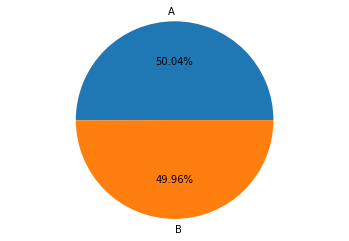

In [12]:
plt.pie(ab_test.email.values, labels=['A','B'], autopct='%.2f%%')
plt.axis('equal')
plt.show()

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [13]:
df["is_application"] = df.application_date.apply(lambda x: 'No Application' if pd.isnull(x) else 'Application')

df

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,No Application
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,No Application
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,Application
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,No Application
...,...,...,...,...,...,...,...,...,...,...
5999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN,B,No Application
6000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A,No Application
6001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A,No Application
6002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,2017-09-13,NaN,B,Application


Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [14]:
app_counts = df.groupby(['ab_test_group','is_application']).first_name.count().reset_index()

app_counts

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [15]:
app_pivot = app_counts.pivot(columns="is_application",index="ab_test_group",values="first_name").reset_index()

app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [16]:
app_pivot["Total"] = app_pivot["Application"] + app_pivot["No Application"]

app_pivot

is_application,ab_test_group,Application,No Application,Total
0,A,250,2254,2504
1,B,325,2175,2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [17]:
app_pivot["Percent_with_Application"] = (100.0 * app_pivot["Application"] / app_pivot["Total"]).round(2)

app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent_with_Application
0,A,250,2254,2504,9.98
1,B,325,2175,2500,13.00


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [18]:
from scipy.stats import chi2_contingency

X = [[250, 2254],
     [325, 2175]]
chi2, pval, dof, expected = chi2_contingency(X)

pval
# The p-value is less than 0.05, therefore the result is signficant!

p_value = 0.0009647827600722304

## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [19]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Not Member' if pd.isnull(x) else 'Member')


df

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,No Application,Not Member
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,No Application,Not Member
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,Application,Member
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,No Application,Not Member
...,...,...,...,...,...,...,...,...,...,...,...
5999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN,B,No Application,Not Member
6000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A,No Application,Not Member
6001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,2017-09-15,NaN,NaN,A,No Application,Not Member
6002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,2017-09-13,NaN,B,Application,Not Member


Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [20]:
just_apps = df[df['is_application'] == 'Application']

just_apps


,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,Application,Member
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
1009,Salvador,Cardenas,SCardenas1980@gmail.com,male,7-1-17,2017-07-07,2017-07-06,NaN,A,Application,Not Member
1011,Valerie,Munoz,VMunoz1998@gmail.com,female,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
1035,Michael,Burks,MB9820@gmail.com,male,7-1-17,NaN,2017-07-07,2017-07-13,B,Application,Member
...,...,...,...,...,...,...,...,...,...,...,...
5944,Frances,Kerr,FK7982@gmail.com,female,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Application,Member
5964,Raymond,Cantrell,Raymond.Cantrell@gmail.com,male,9-9-17,NaN,2017-09-13,2017-09-18,B,Application,Member
5972,Roberta,Acevedo,RA8063@gmail.com,female,9-9-17,NaN,2017-09-15,2017-09-16,B,Application,Member
5991,Suzanne,Humphrey,SuzanneHumphrey4@gmail.com,female,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Application,Member


Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [21]:
app_counts_columns = just_apps.filter(['is_member','ab_test_group','is_application','first_name'])

app_counts = app_counts_columns.groupby(['is_member','ab_test_group']).first_name.count().reset_index()

app_counts_pivot = app_counts.pivot(columns='is_member',index='ab_test_group',values='first_name').reset_index()

app_counts_pivot['Total'] = app_counts_pivot['Member'] + app_counts_pivot['Not Member']

app_counts_pivot['Percent_Purchase'] = 100*(app_counts_pivot['Member'] / app_counts_pivot['Total']).round(2)

#renaming..
member_pivot = app_counts_pivot

member_pivot


is_member,ab_test_group,Member,Not Member,Total,Percent_Purchase
0,A,200,50,250,80.0
1,B,250,75,325,77.0


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [22]:
contingency = [[200, 50],
     [250, 75]]
chi2, pval2, dof, expected = chi2_contingency(contingency)

pval2
# The p-value is 0.4325 therefore the result is not signficant!

p_value2 = 0.43258646051083327


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [23]:
all_visit_purchases_columns = df.filter(['is_member','ab_test_group','is_application','first_name'])

all_visit_purchases = all_visit_purchases_columns.groupby(['is_member','ab_test_group']).first_name.count().reset_index()

all_visit_purchases_pivot = all_visit_purchases.pivot(columns='is_member',index='ab_test_group',values='first_name').reset_index()

all_visit_purchases_pivot['Total'] = all_visit_purchases_pivot['Member'] + all_visit_purchases_pivot['Not Member']

all_visit_purchases_pivot['Percent_Purchase'] = 100*(all_visit_purchases_pivot['Member'] / all_visit_purchases_pivot['Total']).round(2)


final_member_pivot = all_visit_purchases_pivot

final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent_Purchase
0,A,200,2304,2504,8.0
1,B,250,2250,2500,10.0


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [24]:
contingency2 = [[200, 2304],
     [250, 2250]]
chi2, pval3, dof, expected = chi2_contingency(contingency2)

pval3
# The p-value is 0.01473 therefore the result is signficant!

#p_value3 = 0.014724114645783203

0.014724114645783203

## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

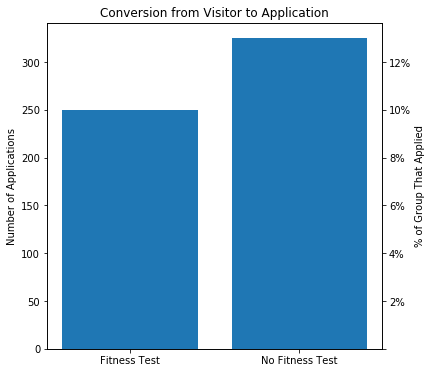

In [25]:
#visits - contains information about potential gym customers who have visited MuscleHub
#fitness_tests -  contains information about potential customers in "Group A", who were given a fitness test
#applications - contains information about any potential customers (both "Group A" and "Group B") who filled out an application. Not everyone in visits will have filled out an application.
#purchases - contains information about customers who purchased a membership to MuscleHub.

app_pivot
#conversion from visitor to application

plt.figure(figsize=(6,6))
ax = plt.subplot()
plt.bar(app_pivot.ab_test_group, app_pivot.Application)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
plt.ylabel('Number of Applications')
plt.title('Conversion from Visitor to Application')

ax2=ax.twinx()
ax2.bar(app_pivot.ab_test_group, app_pivot.Percent_with_Application)
ax2.set_xticks(range(len(app_pivot)))
ax2.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax2.set_yticks([0, 2, 4, 6, 8, 10, 12])
ax2.set_yticklabels(['', '2%', '4%', '6%', '8%','10%','12%'])
plt.ylabel('% of Group That Applied')


plt.show()

#notice that if the yticks were 0,1,2 then they'd only go half way up the chart
#Also if it went 0,1,4,6 then the second yticklabel would be positioned proportionally 
#up the graph.


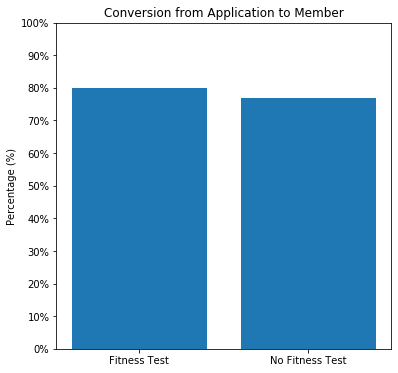

In [26]:
member_pivot
#conversion from application to member

plt.figure(figsize=(6,6))
ax3 = plt.subplot()
plt.bar(member_pivot.ab_test_group, member_pivot.Percent_Purchase)
plt.ylim(0,100)
ax3.set_xticks(range(len(member_pivot)))
ax3.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax3.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax3.set_yticklabels(['0%', '10%', '20%', '30%', '40%','50%','60%','70%', '80%','90%','100%'])
plt.ylabel('Percentage (%)')
plt.title('Conversion from Application to Member')


plt.show()

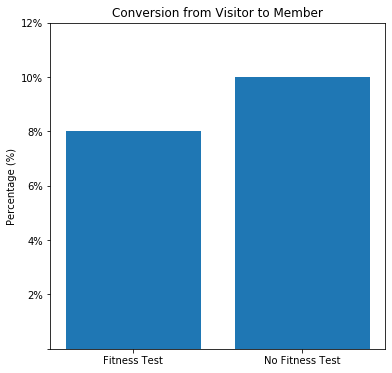

In [27]:
final_member_pivot
#Conversion from visitor to member

plt.figure(figsize=(6,6))
ax4 = plt.subplot()
plt.bar(final_member_pivot.ab_test_group, final_member_pivot.Percent_Purchase)
ax4.set_xticks(range(len(final_member_pivot)))
ax4.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax4.set_yticks([0, 2, 4, 6, 8, 10, 12])
ax4.set_yticklabels(['', '2%', '4%', '6%', '8%','10%','12%'])
plt.ylabel('Percentage (%)')
plt.title('Conversion from Visitor to Member')


plt.show()

# Conclusion

### We undertook an A/B test where visitors to our gym upon either did (A) or did not (B) had a fitness test upon entry.

### From our data analysis, we can extrapolate that not taking a fitness test is more effective method for generating revenue.

### The most important statistics to highlight here are:
###           1) Group B had 30% more applicants with a conversion of 13% vs 10% (Group A) -  a rate that is significantly higher than A.
     
###           2) Group B made 25% more purchases with a conversion of 10% vs 8% (Group A) - again, a rate that is significantly higher than A.

### It is worth noting that the % of purchases was slightly higher in Group A than Group B post-application. Perhaps, the test envokes a degree of commitment or reaffirmation in joining the gym and getting fit. However, from our hypothesis testing this difference is only negligible and does not carry enough weight to keep the fitness tests running.

### From this, I believe we should instead look to reallocate our capital and human resources from fitness testing to other areas of the business to further drive revenue.
